In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.ndimage import gaussian_filter

In [2]:
#Importing file path to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Roll up the cheeses
emmental = np.loadtxt('/content/drive/MyDrive/Cheese_Project/Average_cheese.csv', delimiter=",", unpack=True)
emmental_wav = emmental[0]
emmental_abs = emmental[1]
cheddar = np.loadtxt('/content/drive/MyDrive/Cheese_Project/Cheddar_R.csv', delimiter=",", unpack=True)
cheddar_wav = cheddar[0]
cheddar_abs = cheddar[1]
dry_parmesan = np.loadtxt('/content/drive/MyDrive/Cheese_Project/Dry_Parmesan_R.csv', delimiter=",", unpack=True)
dry_parmesan_wav = dry_parmesan[0]
dry_parmesan_abs = dry_parmesan[1]
ricotta = np.loadtxt('/content/drive/MyDrive/Cheese_Project/Ricotta_R.csv', delimiter=",", unpack=True)
ricotta_wav = ricotta[0]
ricotta_abs = ricotta[1]

In [4]:
#Compute the reflectances from the absorbances
emmental_refl = -1/ np.exp(emmental_abs)    +1.3     #normalisation factor (chosen by visual inspection)
cheddar_refl = 1/ np.exp(cheddar_abs) +0.1   #normalisation factor (chosen by visual inspection)
dry_parmesan_refl = 1/ np.exp(dry_parmesan_abs) +0.1 #normalisation factor (chosen by visual inspection)
ricotta_refl = 1/ np.exp(ricotta_abs) +0.5           #normalisation factor (chosen by visual inspection)
dry_parmesan_refl += 0                               #<--- this line does nothing

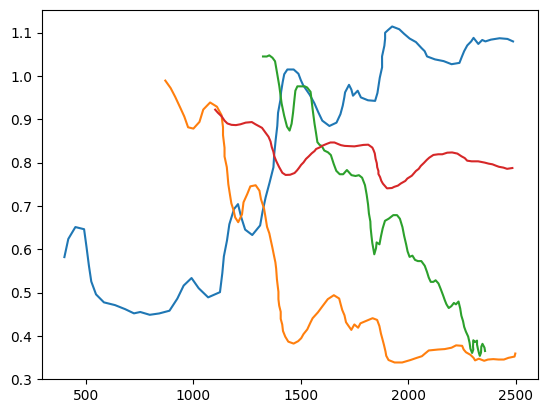

In [5]:
# Plot some stuff
plt.plot(emmental_wav, emmental_refl)
plt.plot(cheddar_wav, cheddar_refl)
plt.plot(dry_parmesan_wav, dry_parmesan_refl)
plt.plot(ricotta_wav, ricotta_refl)
#figuring out which curves correspond to which is left as an exercice to the reader (I mean, you've come this far already...)

In [6]:
# To the Mooon!
# This is
kepler_spec = np.loadtxt('/content/drive/MyDrive/Cheese_Project/Kepler_region_diff_R.csv', delimiter=",", unpack=True)
kepler_wav = kepler_spec[0]
kepler_diff_R = kepler_spec[1]
#This is some sort of Mountain range with a very creative name (probably an astronomer thing)
upland_spec = np.loadtxt('/content/drive/MyDrive/Cheese_Project/Upland_7_diff_R.csv', delimiter=",", unpack=True)
upland_wav   = upland_spec[0]
upland_diff_R = upland_spec[1]
#Some people say this next one is where Buzz Lightyear and a champion cyclist (or was he a trumpetist?) took a step on the moon
mare_spec = np.loadtxt('/content/drive/MyDrive/Cheese_Project/Mare_Tranquillitatis_diff_R.csv', delimiter=",", unpack=True)
mare_wav    = mare_spec[0]
mare_diff_R = mare_spec[1] -0.2    #calibration error
#This place is another crater named for some other dead white guy apparently
plato_spec = np.loadtxt('/content/drive/MyDrive/Cheese_Project/Plato_C_diff_R.csv', delimiter=",", unpack=True)
plato_wav   = plato_spec[0]
plato_diff_R = plato_spec[1] -0.4  #calibration error

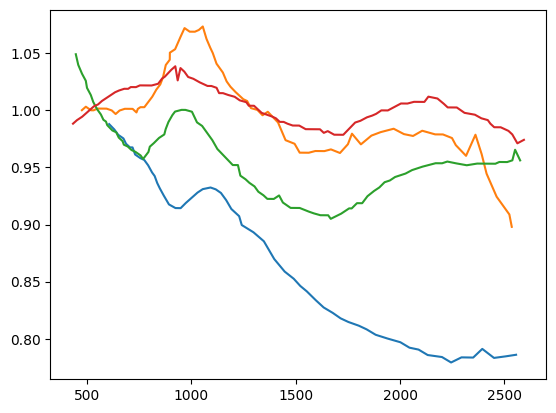

In [7]:
# Plot the Moon (well not literally the Moon but you get it)
plt.plot(kepler_wav, kepler_diff_R)
plt.plot(upland_wav, upland_diff_R)
plt.plot(mare_wav, mare_diff_R)
plt.plot(plato_wav, plato_diff_R)

In [8]:
# Smooth out the curves with Gauss magic UwU
emmental_refl = gaussian_filter(emmental_refl,
                              sigma=5,
                              mode='nearest')
dry_parmesan_refl = gaussian_filter(dry_parmesan_refl,
                              sigma=5,
                              mode='nearest')
cheddar_refl = gaussian_filter(cheddar_refl,
                              sigma=5,
                              mode='nearest')
ricotta_refl = gaussian_filter(ricotta_refl,
                              sigma=5,
                              mode='nearest')

In [9]:
#(over)Interpolate to a new wavelength grid because its nicer
wavelengths = np.linspace(1350,2350,100)         # We choose 100 points as that feels like a good number

#Interpolate moon models
moon_kepler = np.interp(wavelengths, kepler_wav, kepler_diff_R)
moon_upland = np.interp(wavelengths, upland_wav, upland_diff_R)
moon_mare = np.interp(wavelengths, mare_wav, mare_diff_R)
moon_plato = np.interp(wavelengths, plato_wav, plato_diff_R)

#Interpolate the cheese
emmental_R  = np.interp(wavelengths, emmental_wav, emmental_refl)
cheddar_R = np.interp(wavelengths, cheddar_wav, cheddar_refl)
dry_parmesan_R = np.interp(wavelengths, dry_parmesan_wav, dry_parmesan_refl)
ricotta_R      = np.interp(wavelengths, ricotta_wav, ricotta_refl)
cheese_wheel  = [emmental_R, cheddar_R, dry_parmesan_R, ricotta_R]   #We create a cheese wheel for the cheeses, they've deserved it

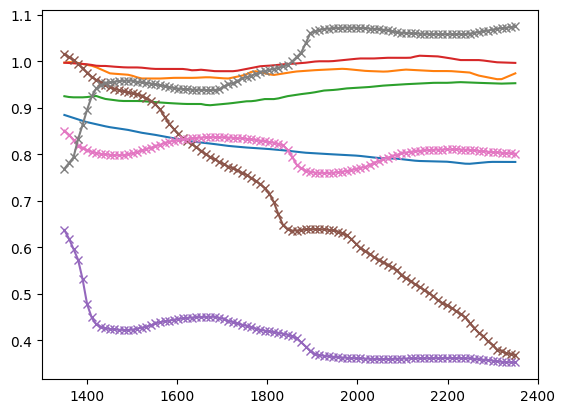

In [10]:
plt.plot(wavelengths, moon_kepler)
plt.plot(wavelengths, moon_upland)
plt.plot(wavelengths, moon_mare)
plt.plot(wavelengths, moon_plato)

plt.plot(wavelengths, cheddar_R, "x-")
plt.plot(wavelengths, dry_parmesan_R, "x-")
plt.plot(wavelengths, ricotta_R, "x-")
plt.plot(wavelengths, emmental_R, "x-")

In [11]:
import scipy.stats as stats
from scipy import optimize
import time

In [12]:
#Run this code to wait for Godot (warning, it might take a while)

Godot_is_here = False
while Godot_is_here == False:
  print("Waiting for Godot...")
  print("Trying to sort Gogo...")
  gogo_sorted   = False
  start_time = time.time()
  #Implementation of the highly advance bogosort algorithm to sort Gogo if the gods wish it
  while gogo_sorted == False:
    gogo = np.random.random(11)
    for g in range(len(gogo)-1):
      if gogo[g]>gogo[g+1]:
        break
      if g == len(gogo)-2:
        gogo_sorted = True
        print("Gogo Sorted in " + str(time.time()-start_time))

  #Shuffling the cheeses for a bit of freshness
  print("Shuffling the cheese wheel")
  rng = np.random.default_rng()
  cheese_wheel_shuffled = rng.shuffle(np.array(cheese_wheel), axis=0)

  #Rolling the dice to see if Didi is here, Godot can't come if he isn't...
  print("Is Didi here?")
  didi = np.random.randint(11)
  if didi > 9:
    print("Yes!")
    break
  else:
    print("No")
    print("Godot can't come.")
    continue
#Maybe we'll have more luck tomorrow...
print("Godot isn't coming today, try again another day...")

Waiting for Godot...
Trying to sort Gogo...
Gogo Sorted in 21.892865657806396
Shuffling the cheese wheel
Is Didi here?
No
Godot can't come.
Waiting for Godot...
Trying to sort Gogo...
Gogo Sorted in 8.182109355926514
Shuffling the cheese wheel
Is Didi here?
No
Godot can't come.
Waiting for Godot...
Trying to sort Gogo...
Gogo Sorted in 123.65189814567566
Shuffling the cheese wheel
Is Didi here?
No
Godot can't come.
Waiting for Godot...
Trying to sort Gogo...
Gogo Sorted in 158.37185430526733
Shuffling the cheese wheel
Is Didi here?
No
Godot can't come.
Waiting for Godot...
Trying to sort Gogo...
Gogo Sorted in 182.10877871513367
Shuffling the cheese wheel
Is Didi here?
No
Godot can't come.
Waiting for Godot...
Trying to sort Gogo...
Gogo Sorted in 48.42920804023743
Shuffling the cheese wheel
Is Didi here?
No
Godot can't come.
Waiting for Godot...
Trying to sort Gogo...
Gogo Sorted in 319.6120717525482
Shuffling the cheese wheel
Is Didi here?
No
Godot can't come.
Waiting for Godot...
Tr

In [13]:
def cheese_model(pos, c_emm, c_parm, c_ched, c_rico):
  """
  pos: positions
  c_emm: emmental concentration
  c_parm: parmesan concentration
  """
  global emmental_R
  global dry_parmesan_R
  global cheddar_R
  global ricotta_R
  return(c_emm*emmental_R[pos]+c_parm*dry_parmesan_R[pos]+c_ched*cheddar_R[pos]+c_rico*ricotta_R[pos])

In [14]:
pos = range(len(wavelengths))
kepler_fit, kepler_fit_cov = optimize.curve_fit(cheese_model, pos, moon_kepler, p0=[0.25,0.25,0.25,0.25] )
upland_fit, upland_fit_cov = optimize.curve_fit(cheese_model, pos, moon_upland, p0=[0.25,0.25,0.25,0.25] )
mare_fit, mare_fit_cov = optimize.curve_fit(cheese_model, pos, moon_mare, p0=[0.25,0.25,0.25,0.25] )
plato_fit, plato_fit_cov = optimize.curve_fit(cheese_model, pos, moon_plato, p0=[0.25,0.25,0.25,0.25] )

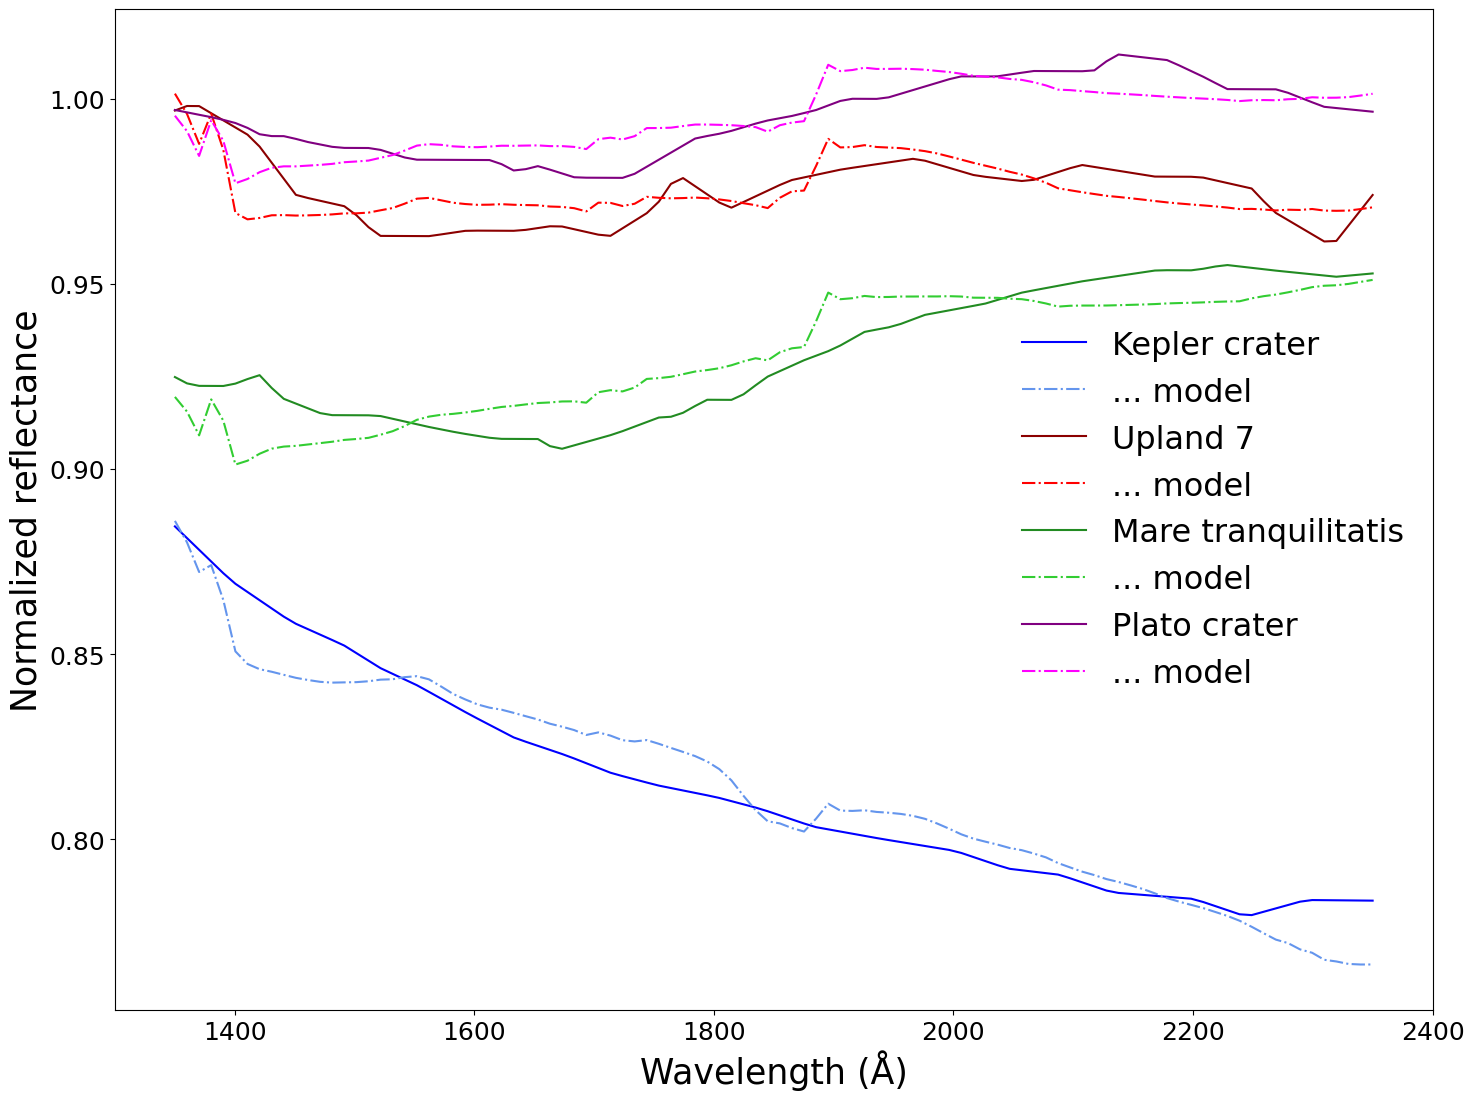

In [15]:
# Plotting function
plt.figure(figsize=(17,13))

plt.plot(wavelengths, moon_kepler, "blue", label="Kepler crater")
plt.plot(wavelengths, cheese_model(pos, *kepler_fit), ls="-.", c="cornflowerblue", label="... model")

plt.plot(wavelengths, moon_upland, "darkred", label="Upland 7")
plt.plot(wavelengths, cheese_model(pos, *upland_fit), ls="-.", c="red", label="... model")

plt.plot(wavelengths, moon_mare, "forestgreen", label="Mare tranquilitatis")
plt.plot(wavelengths, cheese_model(pos, *mare_fit), ls="-.", c="limegreen", label="... model")

plt.plot(wavelengths, moon_plato, "purple", label="Plato crater")
plt.plot(wavelengths, cheese_model(pos, *plato_fit), ls="-.", c="magenta", label="... model")

plt.xlabel(r'Wavelength (Å)', fontsize=25)
plt.xticks(fontsize = 18)
plt.ylabel(r'Normalized reflectance', fontsize=25)
plt.yticks(fontsize = 18)

plt.legend(frameon=False, fontsize=23)

In [ ]:
print(kepler_fit)
print(upland_fit)
print(mare_fit)
print(plato_fit)

[0.39757502 0.16060243 0.4575944  0.14785504]
[0.63768105 0.04309091 0.68956313 0.03297529]
[ 0.62668049 -0.02073167  0.59310558  0.09507256]
[0.63818404 0.02688754 0.58226436 0.12519956]
